# Financial Analysis

The idea here is to start with an analysis of the market data. So we start by observing the market by many visualisation and details.

## Initialisation

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd
from pandas.plotting import scatter_matrix

## Reading of data

In [72]:
stock = {"AAPL":pd.read_csv('data/nasdaq/AAPL.csv', 
        index_col=0), "MSFT":pd.read_csv('data/nasdaq/MSFT.csv', 
        index_col=0),"FB":pd.read_csv('data/nasdaq/FB.csv', index_col=0),
        "AAL":pd.read_csv('data/nasdaq/AAL.csv', index_col=0),
        "MTBC":pd.read_csv('data/nasdaq/MTBC.csv', index_col=0)
        }
for i in stock.keys():
    stock[i] = stock[i][-1500:]
    stock[i].index = pd.to_datetime(stock[i].index, format="%d-%m-%Y")
    print(i)

AAPL
MSFT
FB
AAL
MTBC


## First Visualisation

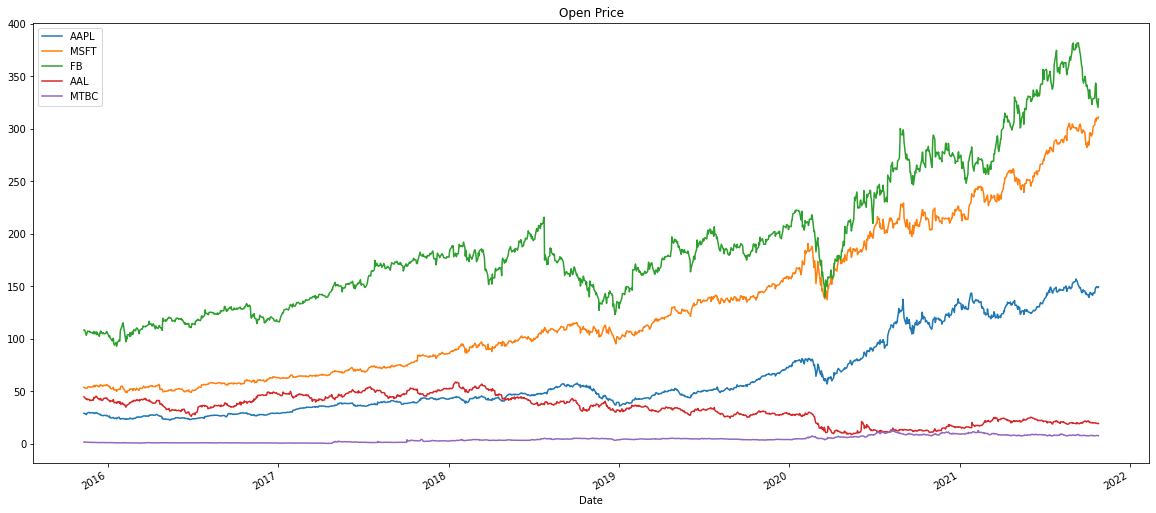

In [73]:
for key in stock.keys():
    stock[key]['Open'].plot(label=key,figsize=(20,9), title='Open Price')
plt.legend()

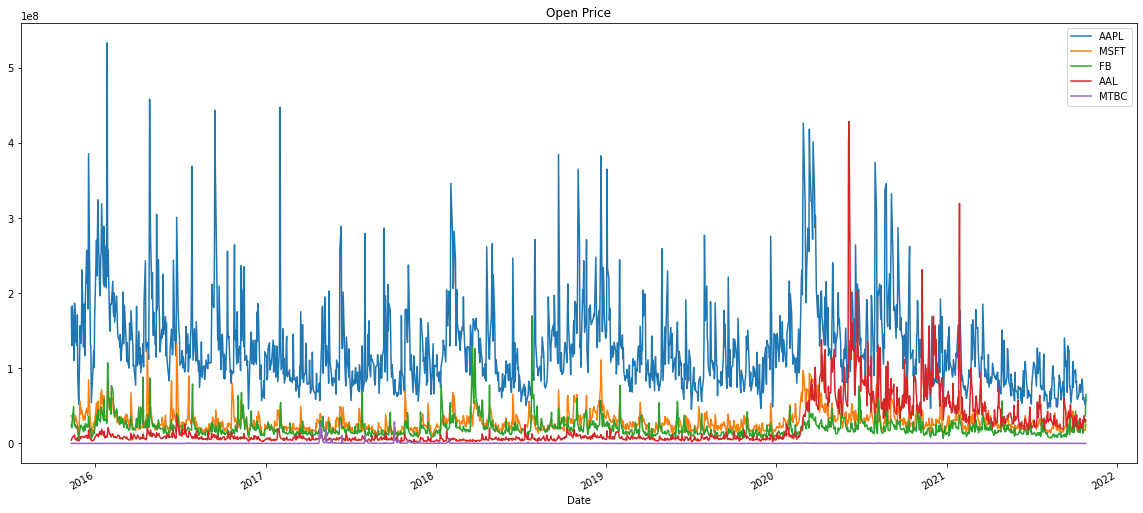

In [74]:
for key in stock.keys():
    stock[key]['Volume'].plot(label=key,figsize=(20,9), title='Open Price')
plt.legend()

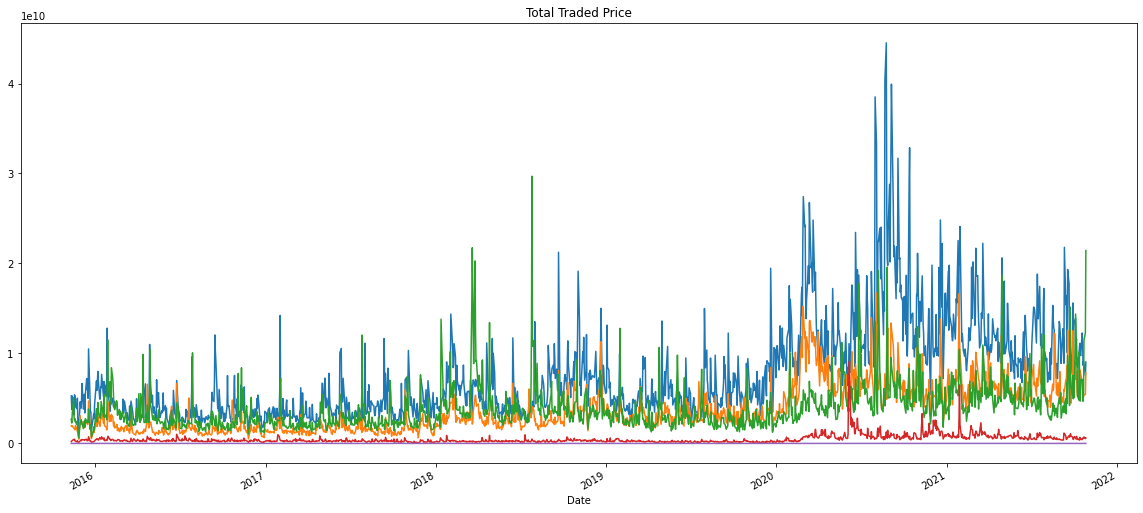

In [75]:
for key in stock.keys():
    stock[key]['Total Traded'] = stock[key]['Volume']*stock[key]['Open']
    stock[key]['Total Traded'].plot(figsize=(20,9), title='Total Traded Price', label=key)

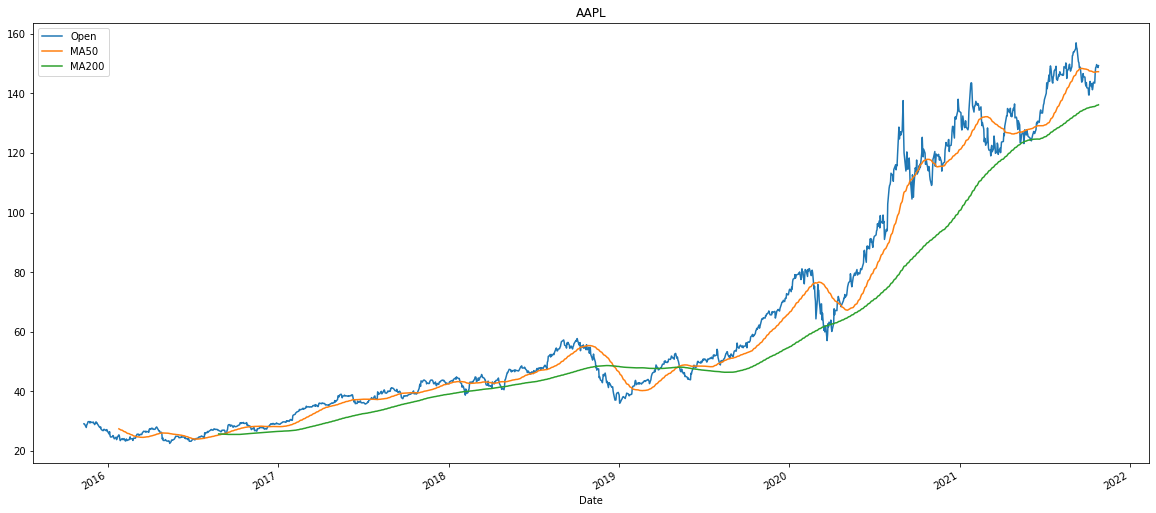

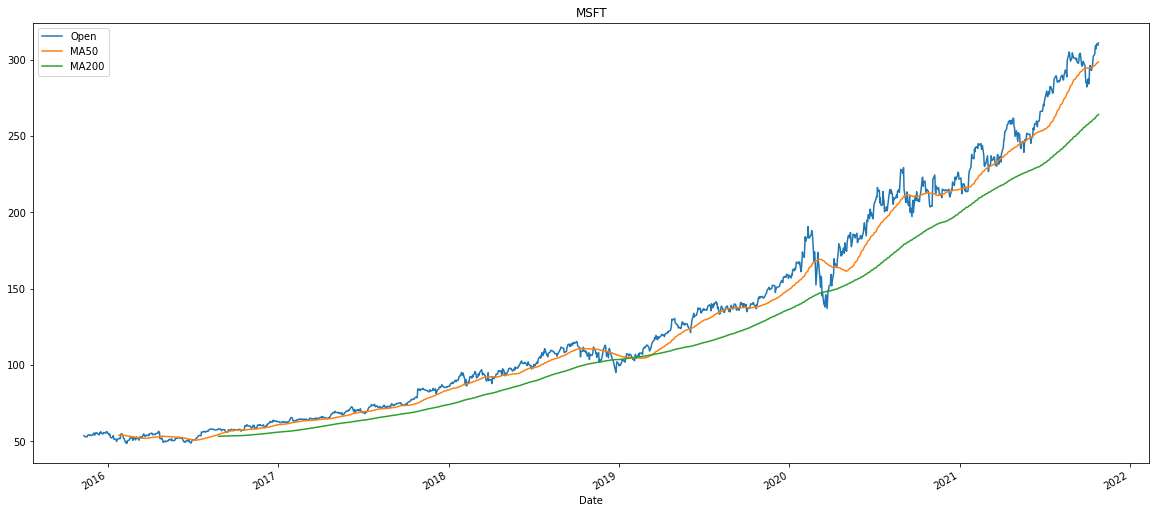

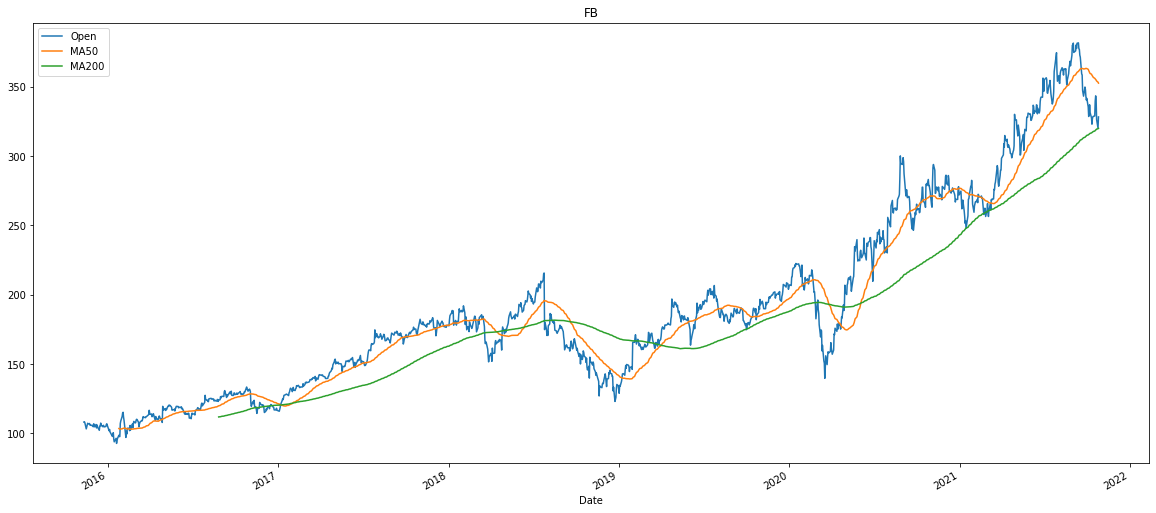

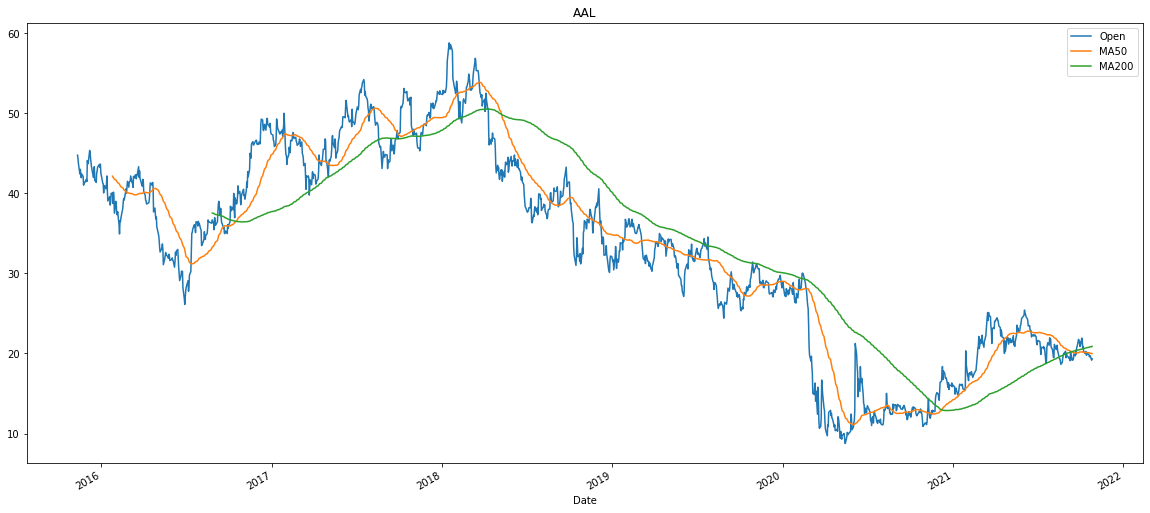

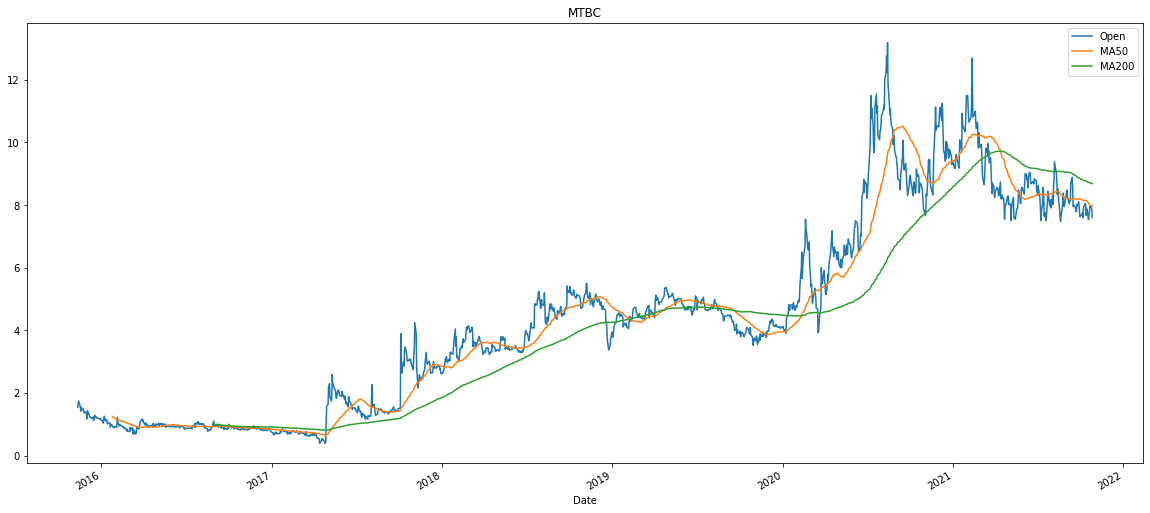

In [76]:
for key in stock.keys():
    stock[key]['MA50'] = stock[key]['Open'].rolling(50).mean()
    stock[key]['MA200'] = stock[key]['Open'].rolling(200).mean()
    stock[key][['Open','MA50','MA200']].plot(figsize=(20,9),title=key)
plt.show()

array([[<AxesSubplot:xlabel='AAPL Returns', ylabel='AAPL Returns'>,
        <AxesSubplot:xlabel='MSFT Returns', ylabel='AAPL Returns'>,
        <AxesSubplot:xlabel='FB Returns', ylabel='AAPL Returns'>,
        <AxesSubplot:xlabel='AAL Returns', ylabel='AAPL Returns'>,
        <AxesSubplot:xlabel='MTBC Returns', ylabel='AAPL Returns'>],
       [<AxesSubplot:xlabel='AAPL Returns', ylabel='MSFT Returns'>,
        <AxesSubplot:xlabel='MSFT Returns', ylabel='MSFT Returns'>,
        <AxesSubplot:xlabel='FB Returns', ylabel='MSFT Returns'>,
        <AxesSubplot:xlabel='AAL Returns', ylabel='MSFT Returns'>,
        <AxesSubplot:xlabel='MTBC Returns', ylabel='MSFT Returns'>],
       [<AxesSubplot:xlabel='AAPL Returns', ylabel='FB Returns'>,
        <AxesSubplot:xlabel='MSFT Returns', ylabel='FB Returns'>,
        <AxesSubplot:xlabel='FB Returns', ylabel='FB Returns'>,
        <AxesSubplot:xlabel='AAL Returns', ylabel='FB Returns'>,
        <AxesSubplot:xlabel='MTBC Returns', ylabel='FB Returns'

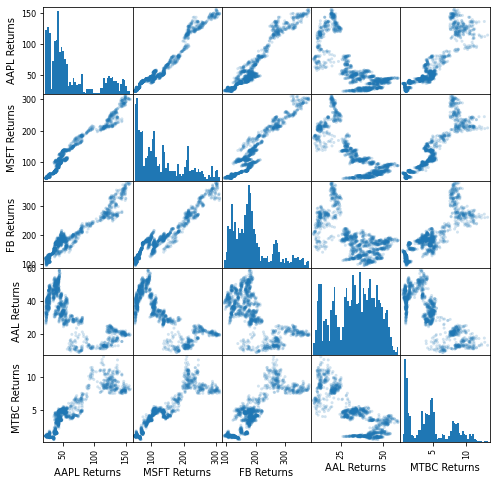

In [77]:
firms = pd.concat([stock[key]['Open'] for key in stock.keys()], axis=1)
firms.columns = [key +' Returns' for key in stock.keys()]
scatter_matrix(firms, figsize=(8,8), alpha=0.2, hist_kwds={'bins':50})

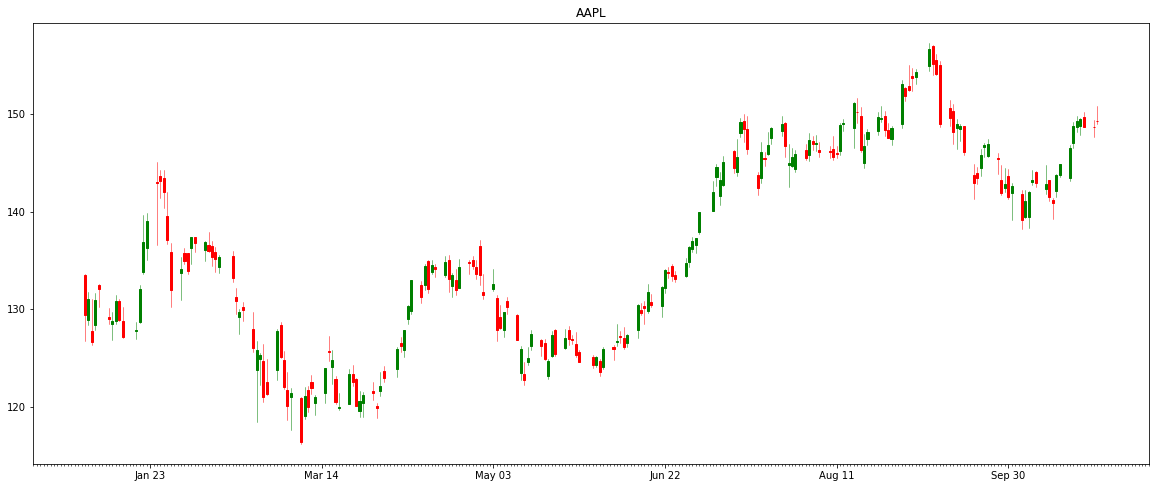

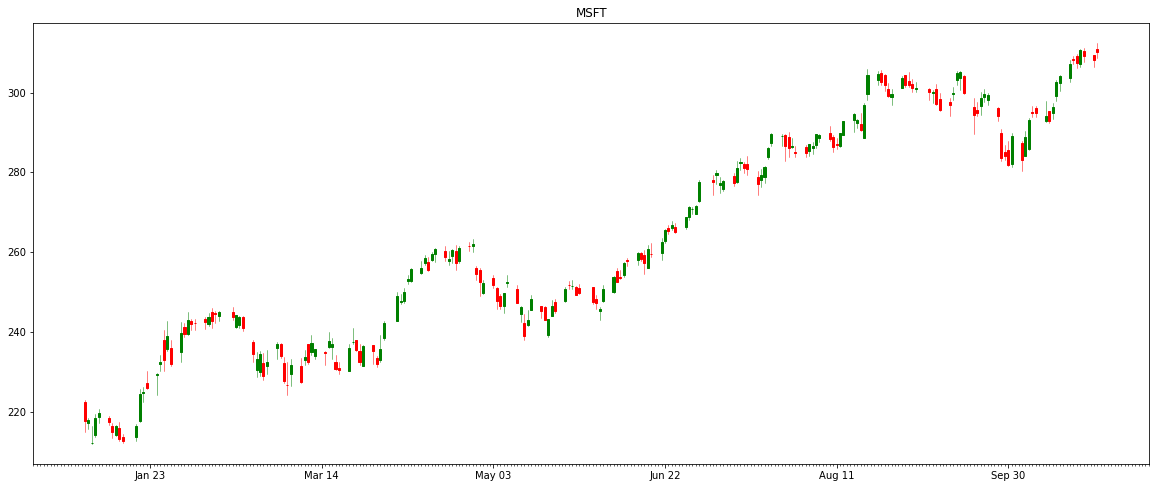

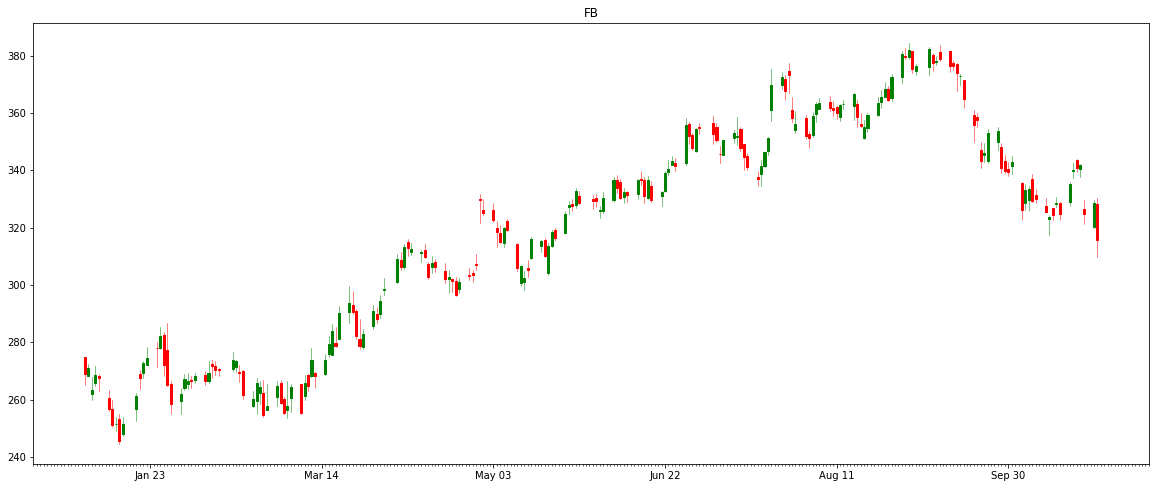

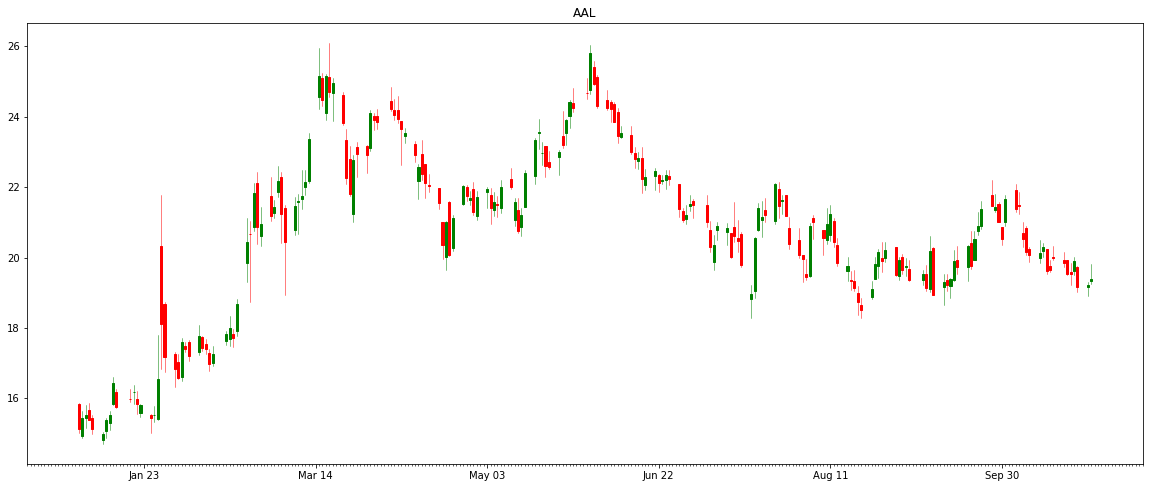

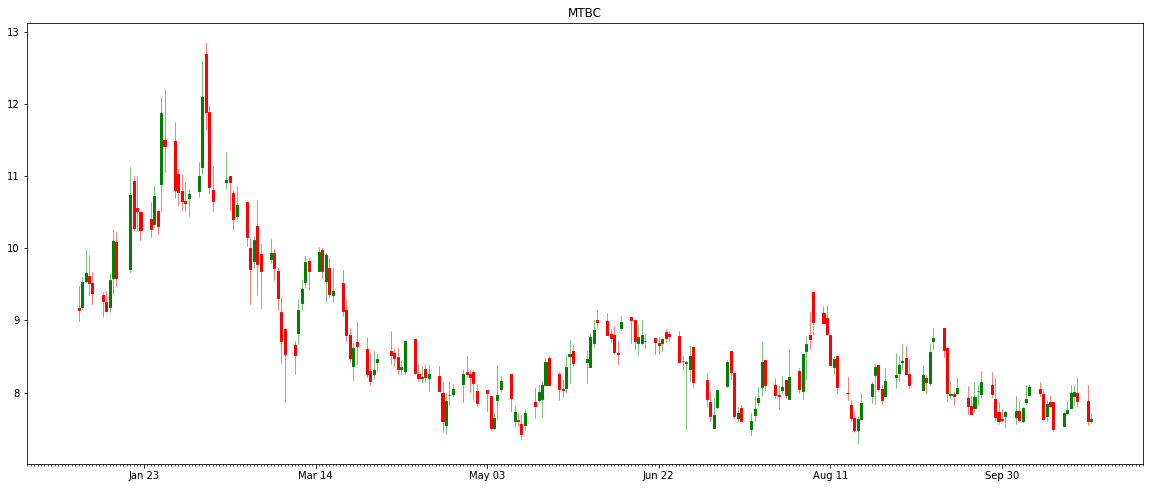

In [86]:
from mplfinance.original_flavor import candlestick_ohlc

from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

for key in stock.keys():
    stock_reset = stock[key]["2021":].reset_index()

    stock_reset['date_ax'] = stock_reset['Date'].apply(lambda date: date2num(date))
    stock_values = [tuple(val) for val in stock_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

    mondays = WeekdayLocator(MONDAY)
    alldays = DayLocator()
    weekFormatter = DateFormatter("%b %d")
    dayFormatter = DateFormatter('%d')
    fig, ax = plt.subplots()
    fig.set_figwidth(20)
    fig.set_figheight(9)
    fig.subplots_adjust(bottom=0.2)
    ax.xaxis.set_minor_locator(alldays)
    ax.xaxis.set_major_formatter(weekFormatter)

    candlestick_ohlc(ax, stock_values, width=0.6, colorup='g', colordown='r',)
    plt.title(key)

    plt.plot()

## Daily Yield
$r_t= \frac{p_t}{p_{t-1}}$


In [79]:
# stock['Returns'] = (stock['Close']/stock['Close'].shift(1))
for key in stock.keys():
    stock[key]['Returns'] = stock[key]['Close'].pct_change(1)
    print(stock[key].tail())

                   Low        Open    Volume        High       Close  \
Date                                                                   
2021-10-20  148.119995  148.699997  58418800  149.750000  149.259995   
2021-10-21  147.869995  148.809998  61421000  149.639999  149.479996   
2021-10-22  148.639999  149.690002  58839600  150.179993  148.690002   
2021-10-25  147.619995  148.679993  50720600  149.369995  148.639999   
2021-10-26  149.010101  149.330002  60564070  150.839996  149.320007   

            Adjusted Close  Total Traded      MA50       MA200   Returns  
Date                                                                      
2021-10-20      149.259995  8.686875e+09  147.1568  135.783851  0.003361  
2021-10-21      149.479996  9.140059e+09  147.2120  135.889301  0.001474  
2021-10-22      148.690002  8.807700e+09  147.2820  135.995951 -0.005285  
2021-10-25      148.639999  7.541138e+09  147.2762  136.077201 -0.000336  
2021-10-26      149.320007  9.044033e+09  147

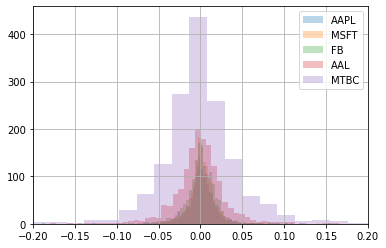

In [93]:
for key in stock.keys():
    stock[key]['Returns'].hist(bins=100, alpha=0.3, label=key)
plt.legend()
y = 0.2
plt.xlim((-y,y))
plt.show()

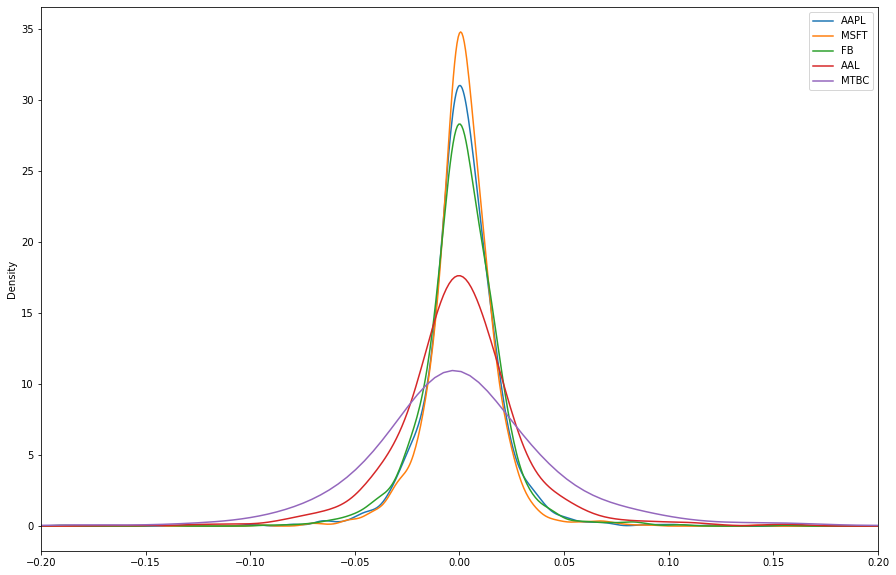

In [89]:

for key in stock.keys():
    stock[key]['Returns'].plot(figsize=(15,10),kind='kde', label=key)
plt.legend()
plt.xlim((-0.2,0.2))
plt.show()

<AxesSubplot:>

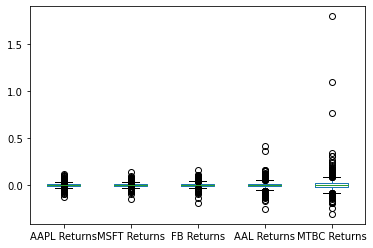

In [82]:
box_df = pd.concat([stock[key]['Returns'] for key in stock.keys()], axis=1)
box_df.columns = [key+' Returns' for key in stock.keys()]
box_df.plot(kind='box')

array([[<AxesSubplot:xlabel='AAPL Returns', ylabel='AAPL Returns'>,
        <AxesSubplot:xlabel='MSFT Returns', ylabel='AAPL Returns'>,
        <AxesSubplot:xlabel='FB Returns', ylabel='AAPL Returns'>,
        <AxesSubplot:xlabel='AAL Returns', ylabel='AAPL Returns'>,
        <AxesSubplot:xlabel='MTBC Returns', ylabel='AAPL Returns'>],
       [<AxesSubplot:xlabel='AAPL Returns', ylabel='MSFT Returns'>,
        <AxesSubplot:xlabel='MSFT Returns', ylabel='MSFT Returns'>,
        <AxesSubplot:xlabel='FB Returns', ylabel='MSFT Returns'>,
        <AxesSubplot:xlabel='AAL Returns', ylabel='MSFT Returns'>,
        <AxesSubplot:xlabel='MTBC Returns', ylabel='MSFT Returns'>],
       [<AxesSubplot:xlabel='AAPL Returns', ylabel='FB Returns'>,
        <AxesSubplot:xlabel='MSFT Returns', ylabel='FB Returns'>,
        <AxesSubplot:xlabel='FB Returns', ylabel='FB Returns'>,
        <AxesSubplot:xlabel='AAL Returns', ylabel='FB Returns'>,
        <AxesSubplot:xlabel='MTBC Returns', ylabel='FB Returns'

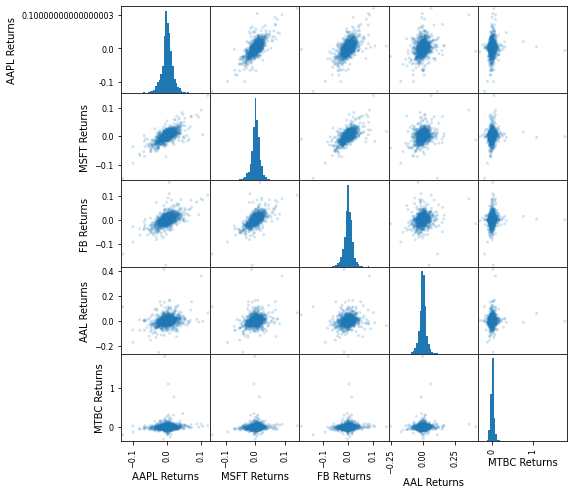

In [83]:
scatter_matrix(box_df, figsize=(8,8), alpha=0.2, hist_kwds={'bins':50})

## Cumulative Returns

$i_t = (1+r_t)*i_{t-1}$

In [84]:
for key in stock.keys():
    stock[key]['Cumulative Return'] = (1+stock[key]['Returns']).cumprod()

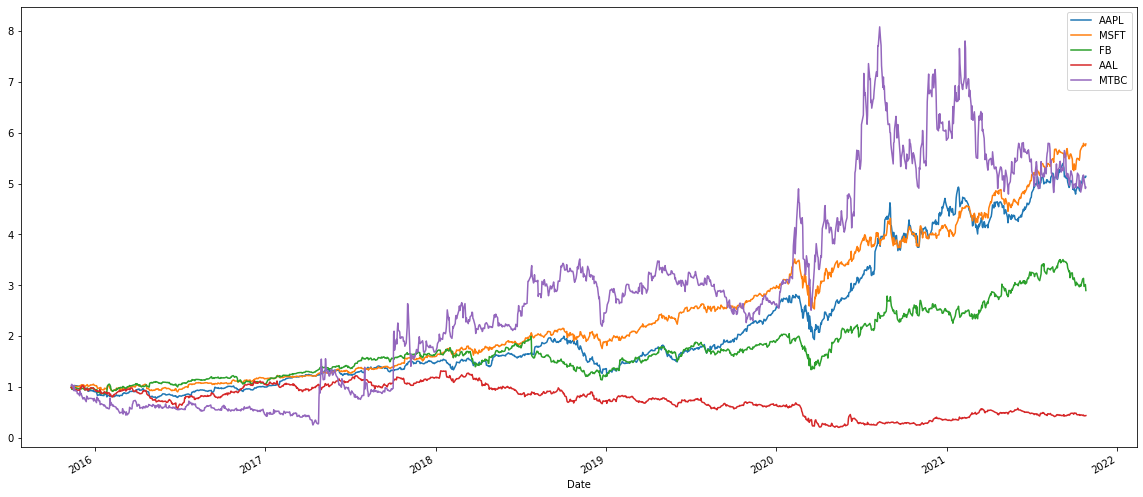

In [85]:
for key in stock.keys():
    stock[key]['Cumulative Return'].plot(figsize=(20,9), label=key)
plt.legend()
plt.show()